In [4]:
#importing the needed libraries needed for performing the needed functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# importing the file needed for performing the analysis
scores = pd.read_csv("C:/Users/tkjay/Desktop/student_scores.csv")

In [6]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
scores.shape

(25, 2)

In [8]:
# checking whether the dataset is empty or not.
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<BarContainer object of 25 artists>

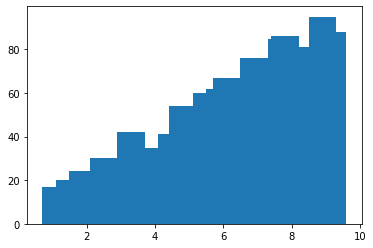

In [9]:
plt.bar(scores.Hours,scores.Scores)

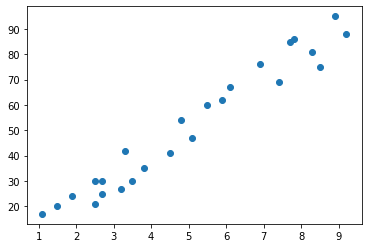

In [10]:
plt.scatter(scores.Hours,scores.Scores)

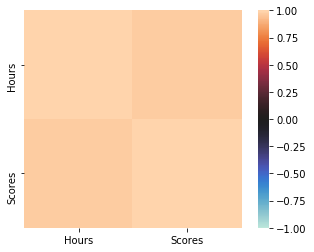

In [11]:
corr = scores.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)

In [12]:
# from the above diagrams we can see that the correct algorithm to implement is LINEAR REGRESSION

### CASE 1. USING LINEAR MODEL WITHOUT TRAIN AND SPLIT METHOD



In [13]:
from sklearn import linear_model

In [14]:
reg = linear_model.LinearRegression()

In [15]:
reg.fit(scores[["Hours"]],scores.Scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.predict([[9.25]])

array([92.90985477])

In [17]:
# The predicted marks for 9.25 hours is 92.90.

### CASE 2. USING LINEAR MODEL USING TRAIN AND SPLIT METHOD


In [18]:
x = scores[['Hours']]
y = scores.Scores

In [19]:
# Splitting the data as train as test with the ratio of 70:30.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [20]:
y_train.head()

24    86
18    67
1     47
17    24
5     20
Name: Scores, dtype: int64

In [21]:
y_train.shape

(17,)

In [32]:
#Fitting the trained model into the linear regression.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

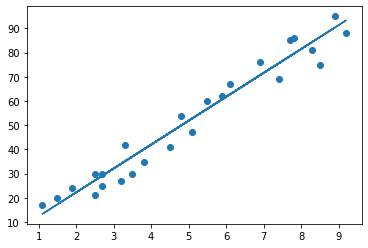

In [44]:
regline = lm.coef_*x+lm.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, regline);
plt.show()

In [24]:
y_pred = lm.predict(x_test)

In [25]:
y_pred

array([84.41780045, 27.16993306, 49.87167357, 29.14399745, 27.16993306,
       93.30109021, 75.53451068, 78.49560727])

In [26]:
data = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
data.head()

,Actual values,Predicted values
8,81,84.417800
16,30,27.169933
21,54,49.871674
9,25,29.143997
0,21,27.169933


In [27]:
hours = 9.25
want_pred = lm.predict([[hours]])

In [28]:
want_pred

array([93.79460631])

In [29]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(want_pred[0]))

No of Hours = 9.25
Predicted Score = 93.79460631176283


In [30]:
# The accuracy of the predicted value.

from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.9628598947375896